In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
RQ4 = pd.read_csv(('../../data/analysis/RQ4.csv'))
RQ4 = RQ4.drop('Unnamed: 0', 1)
RQ4 = RQ4.iloc[1:]

In [3]:
hazard = mpimg.imread('https://cdn.sofifa.org/1x/18/players/183277.png')
ronaldo = mpimg.imread('https://cdn.sofifa.org/1x/18/players/20801.png')
messi = mpimg.imread('https://cdn.sofifa.org/1x/18/players/158023.png')
neymar = mpimg.imread('https://cdn.sofifa.org/1x/18/players/190871.png')
suarez = mpimg.imread('https://cdn.sofifa.org/1x/18/players/176580.png')

(-0.5, 127.5, 127.5, -0.5)

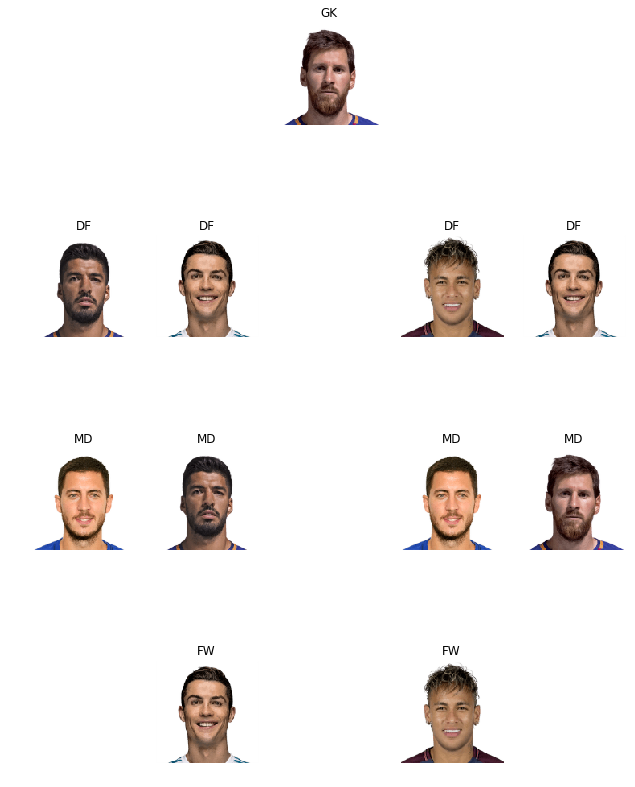

In [4]:
f, axarr = plt.subplots(4,7,figsize=(15,15))

axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,2].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)

axarr[0,4].imshow(messi)
axarr[0,4].set_title("GK")
axarr[0,4].axis('off')


axarr[1,2].imshow(suarez)
axarr[1,2].set_title("DF")
axarr[1,2].axis('off')


axarr[1,3].imshow(ronaldo)
axarr[1,3].set_title("DF")
axarr[1,3].axis('off')


axarr[1,5].imshow(neymar)
axarr[1,5].set_title("DF")
axarr[1,5].axis('off')


axarr[1,6].imshow(ronaldo)
axarr[1,6].set_title("DF")
axarr[1,6].axis('off')


axarr[2,2].imshow(hazard)
axarr[2,2].set_title("MD")
axarr[2,2].axis('off')


axarr[2,3].imshow(suarez)
axarr[2,3].set_title("MD")
axarr[2,3].axis('off')


axarr[2,5].imshow(hazard)
axarr[2,5].set_title("MD")
axarr[2,5].axis('off')


axarr[2,6].imshow(messi)
axarr[2,6].set_title("MD")
axarr[2,6].axis('off')


axarr[3,3].imshow(ronaldo)
axarr[3,3].set_title("FW")
axarr[3,3].axis('off')

axarr[3,5].imshow(neymar)
axarr[3,5].set_title("FW")
axarr[3,5].axis('off')

In [5]:
RQ4 = RQ4.sort_values(['Average Form','Players'],ascending=False)
RQ4 = RQ4.reset_index()
RQ4.drop(RQ4.columns[0], axis=1, inplace=True)
RQ4.head(10)

,Players,club,league,age,nationality,Position,overall,potential,Continent,Average Form
0,Lionel Messi,FC Barcelona,Spanish Primera Division,30.0,Argentina,Forward,93.0,93.0,South America,8.232795
1,Cristiano Ronaldo,Real Madrid CF,Spanish Primera Division,32.0,Portugal,Forward,94.0,94.0,Europe,7.879095
2,Luis Suarez,FC Barcelona,Spanish Primera Division,30.0,Uruguay,Forward,92.0,92.0,South America,6.972698
3,Zlatan Ibrahimovic,Manchester United,English Premier League,35.0,Sweden,Forward,88.0,88.0,Europe,6.854017
4,Robert Lewandowski,FC Bayern Munich,German Bundesliga,28.0,Poland,Forward,91.0,91.0,Europe,6.043066
5,Edinson Cavani,Paris Saint-Germain,French Ligue 1,30.0,Uruguay,Forward,87.0,87.0,South America,5.510013
6,Sergio Aguero,Manchester City,English Premier League,29.0,Argentina,Forward,89.0,89.0,South America,5.509297
7,Gareth Bale,Real Madrid CF,Spanish Primera Division,27.0,Wales,Midfielder,89.0,89.0,Europe,5.420201
8,Pierre Emerick Aubameyang,Borussia Dortmund,German Bundesliga,28.0,Gabon,Forward,88.0,88.0,Africa,5.408480
9,Gonzalo Higuain,Juventus,Italian Serie A,29.0,Argentina,Forward,90.0,90.0,South America,5.374012


In [6]:
RQ4_Best = RQ4[RQ4['age']<34] #best youngish players
RQ4_Youth = RQ4[RQ4['age']<25] #best youngish players
RQ4_Oldies = RQ4[RQ4['age']>30] #best youngish players

In [7]:
def XI(position):
    SquadDB = RQ4_Best.copy()
    
    store = []
    for x in position:
        
        store.append([ x ,SquadDB.loc[[SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax()]]['Players'].to_string(index = False), SquadDB[SquadDB['Position'] == x ]['Average Form'].max()])
        
        SquadDB.drop(SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax(), inplace = True)
     
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Players', 'Average Form']).to_string(index = False)

XI442 = ['Goalkeeper', 'Defender', 'Defender', 'Defender', 'Defender', 'Midfielder', 'Midfielder', 'Midfielder', 'Midfielder', 'Forward', 'Forward']

print ('\n 4-4-2 \n')
print (XI(XI442))


 4-4-2 

Position            Players   Average Form
Goalkeeper      Sergio Romero         4.2425
  Defender        David Alaba  4.65323185682
  Defender        Diego Godin  4.14973163459
  Defender  Giorgio Chiellini  4.10115207373
  Defender   Leonardo Bonucci  3.94767758723
Midfielder        Gareth Bale  5.42020052895
Midfielder       Arjen Robben  4.80556193806
Midfielder         Marco Reus  4.75366595221
Midfielder    James Rodriguez  4.33955392213
   Forward       Lionel Messi  8.23279496125
   Forward  Cristiano Ronaldo  7.87909462636


In [8]:
def XI(position):
    SquadDB = RQ4_Youth.copy()
    
    store = []
    for x in position:
        
        store.append([ x ,SquadDB.loc[[SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax()]]['Players'].to_string(index = False), SquadDB[SquadDB['Position'] == x ]['Average Form'].max()])
        
        SquadDB.drop(SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax(), inplace = True)
     
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Players', 'Average Form']).to_string(index = False)

XI442 = ['Goalkeeper', 'Defender', 'Defender', 'Defender', 'Defender', 'Midfielder', 'Midfielder', 'Midfielder', 'Midfielder', 'Forward', 'Forward']

print ('\n 4-4-2 \n')
print (XI(XI442))


 4-4-2 

Position           Players   Average Form
Goalkeeper       Maxime Dupe  2.86160714286
  Defender      Serge Aurier  3.65197351668
  Defender        Marquinhos   3.4383099659
  Defender    Djibril Sidibe  3.36322540274
  Defender       Lucas Digne  3.18153297683
Midfielder  Hakan Calhanoglu   3.7173326002
Midfielder       Nabil Fekir  3.56410643436
Midfielder        Paul Pogba  3.24283272283
Midfielder   Florian Thauvin  3.12156741108
   Forward      Mauro Icardi  4.69934188729
   Forward     Romelu Lukaku  4.60336336336


In [63]:
def XI(position):
    SquadDB = RQ4_Oldies.copy()
    
    store = []
    for x in position:
        
        store.append([ x ,SquadDB.loc[[SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax()]]['Players'].to_string(index = False), SquadDB[SquadDB['Position'] == x ]['Average Form'].max()])
        
        SquadDB.drop(SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax(), inplace = True)
     
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Players', 'Average Form']).to_string(index = False)

XI442 = ['Goalkeeper', 'Defender', 'Defender', 'Defender', 'Defender', 'Midfielder', 'Midfielder', 'Midfielder', 'Midfielder', 'Forward', 'Forward']

df = (XI(XI442))

In [64]:
df

'Position             Players   Average Form\nGoalkeeper        Manuel Neuer  4.17017132535\n  Defender         Diego Godin  4.14973163459\n  Defender   Giorgio Chiellini  4.10115207373\n  Defender        Thiago Silva  3.93318274318\n  Defender     Andrea Barzagli  3.85132973289\nMidfielder        Arjen Robben  4.80556193806\nMidfielder     Alexander Meier  4.51037598508\nMidfielder       Franck Ribery  4.48063714064\nMidfielder         David Silva  3.76028050109\n   Forward   Cristiano Ronaldo  7.87909462636\n   Forward  Zlatan Ibrahimovic  6.85401665065'

df = " ".join(df.split())

In [65]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

In [66]:
TESTDATA = StringIO(df)

In [67]:
df = pd.read_csv(TESTDATA, sep="\n")

In [68]:
df.columns

Index(['Position             Players   Average Form'], dtype='object')

In [69]:
df

,Position Players Average Form
0,Goalkeeper Manuel Neuer 4.17017132535
1,Defender Diego Godin 4.14973163459
2,Defender Giorgio Chiellini 4.10115207373
3,Defender Thiago Silva 3.93318274318
4,Defender Andrea Barzagli 3.85132973289
5,Midfielder Arjen Robben 4.80556193806
6,Midfielder Alexander Meier 4.51037598508
7,Midfielder Franck Ribery 4.48063714064
8,Midfielder David Silva 3.76028050109
9,Forward Cristiano Ronaldo 7.87909462636


In [70]:
df['A'], df['B'],df['c'], df['d'],df['e'] = df['Position             Players   Average Form'].str.split(' ', 4).str

In [71]:
df['Position'] = df['A']+df['B']+df['c']+df['d']
df = df.drop(['A','B','c','d','Position             Players   Average Form'],1)

In [77]:
df

,e,Position,1,2,3,4,5,6,7,8,Name
0,Manuel Neuer 4.17017132535,Goalkeeper,,,,,Manuel,Neuer,,4.17017132535,
1,Diego Godin 4.14973163459,Defender,,,,,,,,Diego Godin 4.14973163459,
2,Giorgio Chiellini 4.10115207373,Defender,,Giorgio,Chiellini,,4.10115207373,NaN,NaN,NaN,GiorgioChiellini
3,Thiago Silva 3.93318274318,Defender,,,,,,,Thiago,Silva 3.93318274318,
4,Andrea Barzagli 3.85132973289,Defender,,,,Andrea,Barzagli,,3.85132973289,NaN,
5,Arjen Robben 4.80556193806,Midfielder,,,,,Arjen,Robben,,4.80556193806,
6,Alexander Meier 4.51037598508,Midfielder,,Alexander,Meier,,4.51037598508,NaN,NaN,NaN,AlexanderMeier
7,Franck Ribery 4.48063714064,Midfielder,,,,Franck,Ribery,,4.48063714064,NaN,
8,David Silva 3.76028050109,Midfielder,,,,,,David,Silva,3.76028050109,
9,Cristiano Ronaldo 7.87909462636,Forward,,,Cristiano,Ronaldo,,7.87909462636,NaN,NaN,Cristiano


df1['Position'] = 'Goalkeeper','Defender','Defender','Defender','Defender','Midfielder','Midfielder','Midfielder','Midfielder','Forward','Forward'

columns = ['Position', 'Players', 'Average', 'Form']

df1 = pd.DataFrame(columns=columns)
df1 = df1.fillna(0) # with 0s rather than NaNs